<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/0011z_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tamato 


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/PlantVillage')
os.getcwd()

'/content/drive/My Drive/PlantVillage'

### Datasets and Pre Processing

In [0]:
import keras
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
x=[]
y=[]
path='/content/drive/My Drive/PlantVillage/Tomato__Target_Spot'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(0)
path='/content/drive/My Drive/PlantVillage/Tomato__Tomato_mosaic_virus'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(1)
x=np.array(x)
y=np.array(y)

In [0]:
from sklearn.utils import shuffle
(x,y)=shuffle(x,y)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1190, 256, 256, 3)
(1190,)
(587, 256, 256, 3)
(587,)
4
float32
4
float32
4
float32


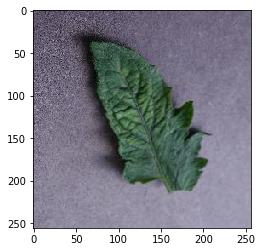

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [49]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
print(xtrain.shape[3])
print(xtrain.shape)
print(type(xtrain[0][0][0][0]))

1190
256
256
3
(1190, 256, 256, 3)
<class 'numpy.float32'>


In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [13]:
print(type(xtrain))

<class 'numpy.ndarray'>


In [52]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1 1
0 0
0.45870566
0.18837602
2.873478 2.873478
-2.4350533 -2.4350533


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],256,256,3)
xtest =  xtest.reshape(xtest.shape[0],256,256,3)

In [19]:
print(xtrain.shape)

(1190, 256, 256, 3)


In [54]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


### LeNet Model

In [0]:
import keras
from keras import models
from keras import layers

In [56]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(256,256,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 6)       456       
_________________________________________________________________
average_pooling2d_3 (Average (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 16)      2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 59536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7144440   
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [27]:
weight_conv2d_1 = model.layers[0].get_weights()[0]
print(weight_conv2d_1.shape)

(5, 5, 3, 6)


### Visualization of randomly initialized filters

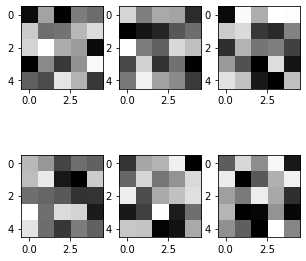

In [57]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [58]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.14172707  0.04590057 -0.15652578 -0.0026298  -0.02282292]
 [ 0.09286997 -0.02115411 -0.01471351  0.06911862  0.11380181]
 [ 0.10528505  0.15816033  0.05592729  0.03490467 -0.14261477]
 [-0.15606289  0.01262227 -0.08667381  0.023093    0.150222  ]
 [-0.03745066 -0.06216067  0.12526435  0.06444977 -0.08526854]]

[[ 0.10507995 -0.00252628  0.05016924  0.0439081  -0.10652776]
 [-0.16329037 -0.13573882 -0.11785167 -0.05370196 -0.02521288]
 [ 0.1589782  -0.00642361 -0.03968217  0.1097497   0.07782283]
 [-0.06997164  0.1016781  -0.09849704 -0.02010846 -0.16307141]
 [-0.00930949  0.14037675  0.04175079  0.01135272 -0.08958094]]

[[-0.14479765  0.14509696  0.05205682  0.15188575  0.1482861 ]
 [ 0.0878033   0.10680166 -0.08992745 -0.10611312 -0.00043979]
 [-0.10202929  0.06015742 -0.01591402 -0.00538464 -0.07925801]
 [ 0.02911812 -0.05981352 -0.15803106  0.1112482  -0.13174687]
 [ 0.11609146  0.0774207  -0.12761022 -0.15679526  0.07512061]]

[[ 0.05514336  0.01945384 -0.07001206 -0.02494895

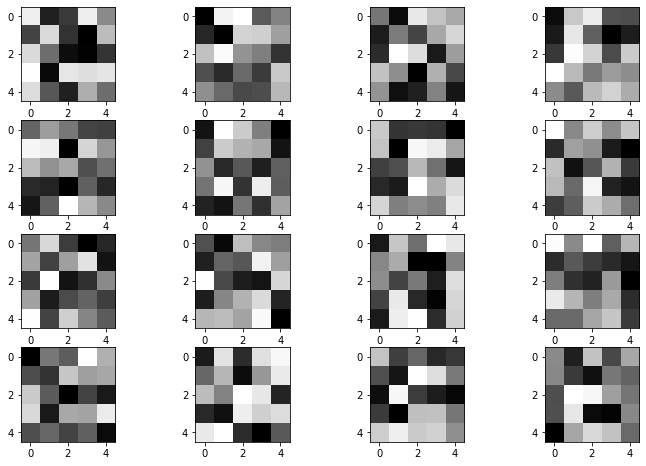

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.07095663 -0.076038   -0.05779788  0.07037282 -0.00076324]
 [-0.05162129  0.05612586 -0.06370746 -0.09985491  0.03471956]
 [ 0.05630668 -0.02196972 -0.09057463 -0.09777109 -0.06144595]
 [ 0.08286628 -0.09313184  0.06431304  0.05865286  0.06372501]
 [ 0.05752438 -0.03739079 -0.07620582  0.02445    -0.02178296]]

[[-9.7110406e-02  8.2502365e-02  9.1967121e-02 -2.9515550e-02
  -5.6922436e-05]
 [-6.7967691e-02 -9.7143158e-02  5.9075847e-02  5.5854112e-02
   2.1050707e-02]
 [ 4.6162322e-02  8.8163391e-02  1.1813410e-02 -3.1273216e-03
  -5.9919585e-02]
 [-3.8542978e-02 -6.5534294e-02 -1.8973961e-02 -5.3455420e-02
   5.1555768e-02]
 [ 8.6908489e-03 -1.8554561e-02 -4.2154416e-02 -3.9854296e-02
   3.8965359e-02]]

[[ 0.00223435 -0.07766037  0.08690472  0.05941176  0.04025459]
 [-0.06460995  0.00691272 -0.03492417  0.03946188  0.07344939]
 [-0.05341871  0.10405983  0.0787304  -0.06649177  0.03128053]
 [ 0.05891643  0.01994304 -0.08535308  0.04489516 -0.03200381]
 [ 0.02438822 -0.07360939 -0.

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [60]:
os.chdir('/content/drive/My Drive/PlantVillage')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

/content/drive/My Drive/PlantVillage


In [61]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Train on 952 samples, validate on 238 samples
Epoch 1/50
952/952 [==============================] - 1s 1ms/step - loss: 0.5568 - acc: 0.7952 - val_loss: 0.3622 - val_acc: 0.8193

Epoch 00001: val_loss improved from inf to 0.36225, saving model to CNN_MNIST.h5
Epoch 2/50
952/952 [==============================] - 1s 804us/step - loss: 0.3647 - acc: 0.7983 - val_loss: 0.4017 - val_acc: 0.9538

Epoch 00002: val_loss did not improve from 0.36225
Epoch 3/50
952/952 [==============================] - 1s 812us/step - loss: 0.3632 - acc: 0.8897 - val_loss: 0.2732 - val_acc: 0.9622

Epoch 00003: val_loss improved from 0.36225 to 0.27322, saving model to CNN_MNIST.h5
Epoch 4/50
952/952 [==============================] - 1s 811us/step - loss: 0.2495 - acc: 0.9181 - val_loss: 0.2006 - val_acc: 0.9454

Epoch 00004: val_loss improved from 0.27322 to 0.20062, saving model to CNN_MNIST.h5
Epoch 5/50
952/952 [==============================] - 1s 805us/step - loss: 0.1663 - acc: 0.9538 - val_loss: 0.272

### Evaluate

In [62]:
model.evaluate(xtest,ytest)

587/587 [==============================] - 0s 633us/step


[0.05281656983687687, 0.9778534923339012]

### Prediction

In [63]:
pred=model.predict(xtest[0].reshape(1,256,256,3))
print(pred)
print(pred.argmax())

[[0.00481106 0.99518895]]
1


In [64]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

587/587 [==============================] - 0s 590us/step
0.05281656983687687
0.9778534923339012


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

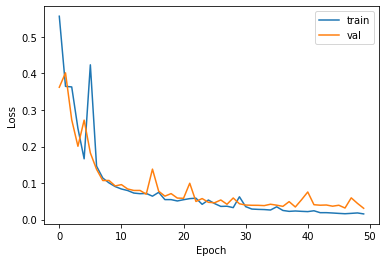

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

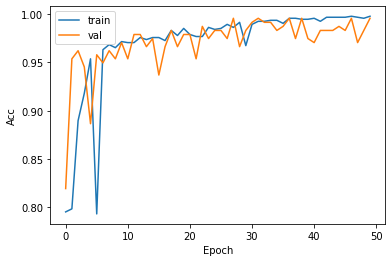

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [68]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 256, 256, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [1. 0.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [1. 0.] Predicted is 0
7 Actual is  [0. 1.] Predicted is 1
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 0


In [69]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       449
     class 1       0.96      0.94      0.95       138

    accuracy                           0.98       587
   macro avg       0.97      0.97      0.97       587
weighted avg       0.98      0.98      0.98       587



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[444   5]
 [  8 130]]


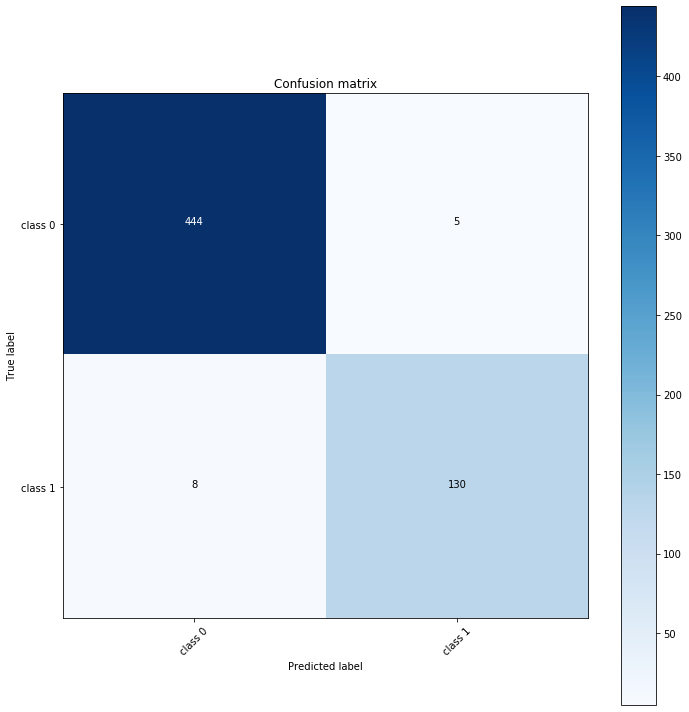

In [72]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])